<a href="https://colab.research.google.com/github/svhenrique/ufal/blob/main/RN/abrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#**Universidade Federal de Alagoas - UFAL**

# **Ciência da Computação**

## Redes Neurais

## **Análise de Bibliotécas para Redes Neurais**

</center>

## Scikit-learn

### O que é

*    Scikit-learn é o pacote de aprendizagem de máquina mais popular na comunidade de ciência de dados. 
*    É open-source e suporta aprendiazgem supervisionada e não supervisionada.
*    Fornece ferramentas para model fitting, data preprocessing, model selection, model evaluation, e vários outros.


### Facilidade de uso

*   Para criar um modelo de Machine Learning, basta apenas algumas linhas com o scikit-learn. 

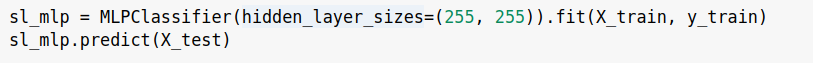

### Performance 

*    Scikit-learn utiliza biblioteca NumPy para o aumento de performance de operações com array e algebra linear.

*    Alguns algoritmos em seu core foram escritos em Cython para o aumento de performance.

### Empresas



*   Spotify
    *   Usado para recomendações musicais 
*   Evernote
    *   Usado para atividades de Data Science


## Keras

### O que é

*   Keras é um API de aprendizado profundo escrito em Python.
*   É executado em cima da plataforma de aprendizado da máquina TensorFlow.
*   Foi desenvolvido com o foco em permitir uma rápida experimentação. 

### Facilidade de uso



*   Criando modelo CNN



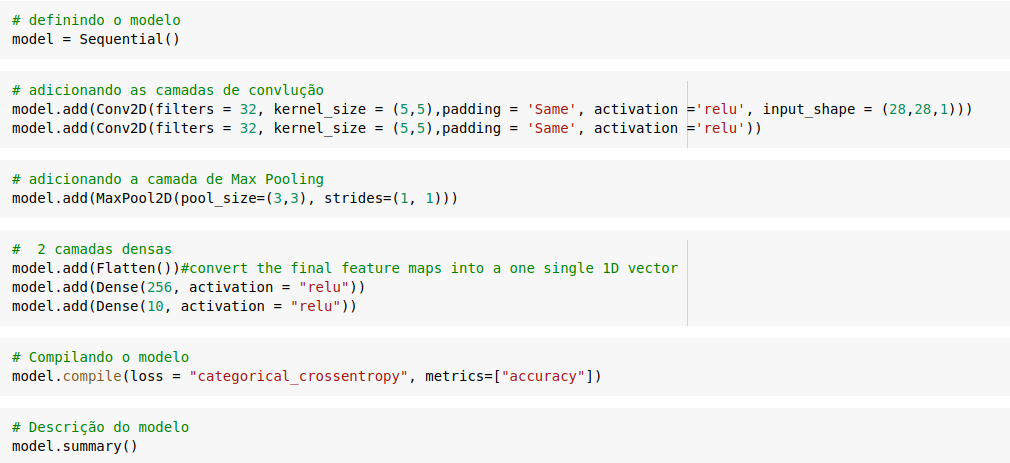

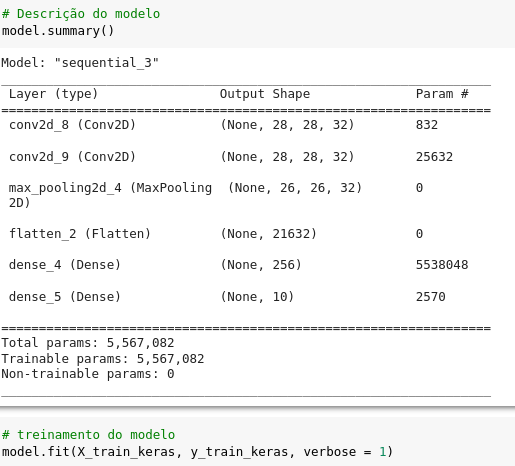



### Performance 



*   Agilidade na criação de modelos de Deep Learning.
*   Keras é uma abstração do TensorFlow
    *   TensorFlor é escrito em Python, C++, CUDA



### Empresas



*   Coca-Cola
*   Google
*   Intel




## PyTorch

### O que é 



*   PyTorch é um pacote de computação científica baseado em Python que utiliza o poder de unidades de processamento gráfico. 
*   É conhecida por fornecer duas das características de mais alto nível, a saber, cálculos tensoriais com forte suporte à aceleração da GPU.
*   Suporta gráficos de computação dinâmica




### Facilidade de uso 



*   Não é tão fácil quanto Keras e scikit-learn
*   É preciso implementar a maior parte do processo que ferramentas como o Keras e scikit-learn deixam prontos para uso 


### Performance 

*   Escrito em C++



### Empresas



*   Microsoft
*   Outlook
*   NVIDIA

